In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('data/stoma_dataset.csv')

In [29]:
data.head()

,dates,id,not_registered,num_caries,num_filling_caries,num_filling_no_caries,num_healthy,num_removed_caused_by_caries,num_removed_other_reasons,prosthesis crown veneer,sealed fissure,uncut tooth,kpu,kpu_%
0,2011-2012,1302.xlsx,4,3,0,0,21,0,0,0,0,0,3,0.107143
1,2012-2013,1302.xlsx,4,3,0,0,21,0,0,0,0,0,3,0.107143
2,2013-2014,1302.xlsx,0,4,0,1,23,0,0,0,0,0,5,0.178571
3,2014-2015,1302.xlsx,0,4,0,3,21,0,0,0,0,0,7,0.250000
4,2015-2016,1302.xlsx,0,2,1,4,22,0,0,0,0,0,7,0.250000


In [12]:
data['not_registered'].value_counts()

0     467
4     244
1       7
2       6
5       2
11      1
Name: not_registered, dtype: int64

In [4]:
data.drop(data[data['not_registered']==28].index, axis=0, inplace=True)

In [5]:
data['kpu'] = data[['num_caries', 'num_filling_caries',
                    'num_filling_no_caries', 
                    'num_removed_caused_by_caries', 'num_removed_other_reasons']].sum(axis=1)

In [6]:
def divide(a):
    return a/28.

In [7]:
data['kpu_%'] = data['kpu'].apply(lambda a: divide(a))

In [8]:
data['kpu_%']

0       0.107143
1       0.107143
2       0.178571
3       0.250000
4       0.250000
          ...   
1328    0.000000
1329    0.000000
1334    0.107143
1335    0.107143
1336    0.107143
Name: kpu_%, Length: 727, dtype: float64

Text(0.5,1,'Индекс КПУ по годам, абсолютное значение')

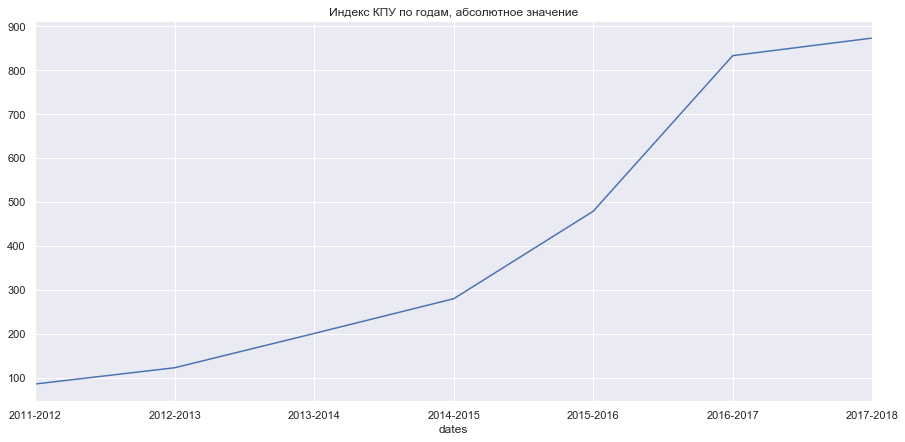

In [9]:
years_sum = data.groupby('dates').sum()
plt.figure(figsize=(15, 7))
years_sum['kpu'].plot()
plt.title('Индекс КПУ по годам, абсолютное значение')

In [13]:
years_sum

,not_registered,num_caries,num_filling_caries,num_filling_no_caries,num_healthy,num_removed_caused_by_caries,num_removed_other_reasons,prosthesis crown veneer,sealed fissure,uncut tooth,kpu,kpu_%
dates,,,,,,,,,,,,
2011-2012,218,54,2,30,1241,0,0,0,1,9,86,3.071429
2012-2013,213,79,3,41,1212,0,0,0,2,5,123,4.392857
2013-2014,5,113,13,74,1380,0,1,0,10,0,201,7.178571
2014-2015,4,144,16,116,1301,3,1,0,11,0,280,10.000000
2015-2016,245,199,37,237,2686,5,1,0,10,0,479,17.107143
2016-2017,308,280,53,492,4193,7,1,0,10,0,833,29.750000
2017-2018,23,209,54,600,4410,9,1,0,10,0,873,31.178571


In [14]:
def divide_all_teeth(kpu, counts):
    print(counts, kpu)
    res = kpu/(counts*28)
    print(res)
    return res

57 86
0.05388471177944862
57 123
0.07706766917293233
57 201
0.12593984962406016
57 280
0.17543859649122806
118 479
0.14497578692493945
191 833
0.15575916230366493
190 873
0.16409774436090224


Text(0.5,1,'Индекс КПУ по годам, относительное значение рассчитано для всех зубов во всех ротах ')

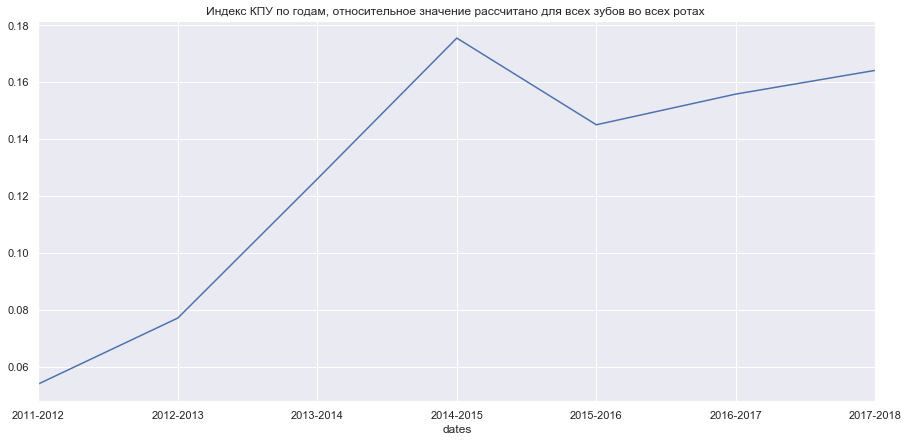

In [15]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_kpu'] = years_sum[['kpu', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_kpu'].plot()
plt.title('Индекс КПУ по годам, относительное значение рассчитано для всех зубов во всех ротах ')

Text(0.5,1,'Медианный Индекс КПУ по годам, относительное значение (%)')

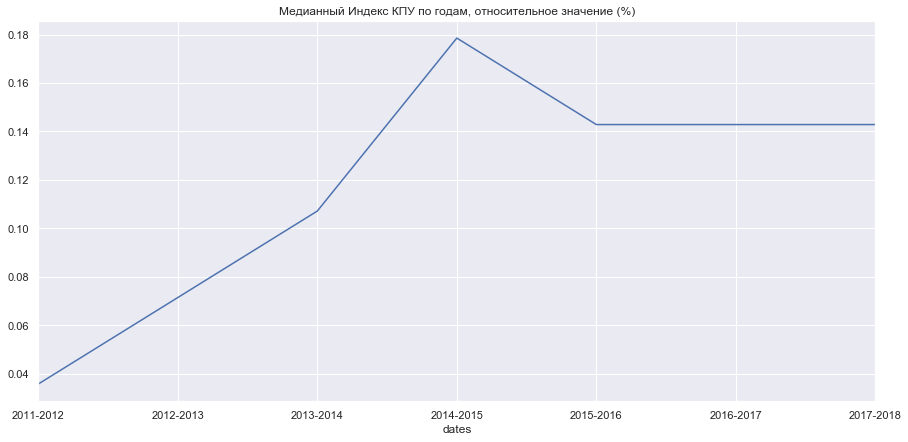

In [16]:
years_median = data.groupby('dates').median()
plt.figure(figsize=(15, 7))
years_median['kpu_%'].plot()
plt.title('Медианный Индекс КПУ по годам, относительное значение (%)')

In [21]:
years_median

,not_registered,num_caries,num_filling_caries,num_filling_no_caries,num_healthy,num_removed_caused_by_caries,num_removed_other_reasons,prosthesis crown veneer,sealed fissure,uncut tooth,kpu,kpu_%
dates,,,,,,,,,,,,
2011-2012,4,0,0,0,22,0,0,0,0,0,1,0.035714
2012-2013,4,1,0,0,21,0,0,0,0,0,2,0.071429
2013-2014,0,2,0,1,25,0,0,0,0,0,3,0.107143
2014-2015,0,2,0,2,23,0,0,0,0,0,5,0.178571
2015-2016,4,1,0,2,23,0,0,0,0,0,4,0.142857
2016-2017,0,1,0,2,22,0,0,0,0,0,4,0.142857
2017-2018,0,0,0,3,23,0,0,0,0,0,4,0.142857


# Процент зубов с кариесом без пломб

57 54
0.03383458646616541
57 79
0.04949874686716792
57 113
0.07080200501253132
57 144
0.09022556390977443
118 199
0.06023002421307506
191 280
0.05235602094240838
190 209
0.039285714285714285


Text(0.5,1,'% кариеса по годам, относительное значение рассчитано для всех зубов во всех ротах')

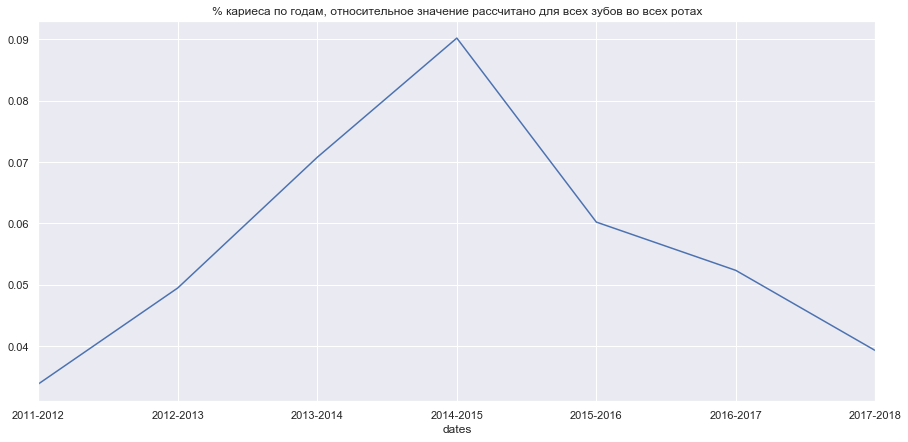

In [19]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_caries'] = years_sum[['num_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_caries'].plot()
plt.title('% кариеса по годам, относительное значение рассчитано для всех зубов во всех ротах')

57 2
0.0012531328320802004
57 3
0.0018796992481203006
57 13
0.008145363408521303
57 16
0.010025062656641603
118 37
0.011198547215496369
191 53
0.009910246821241586
190 54
0.010150375939849625


Text(0.5,1,'Доля зубов с кариесом и пломбами')

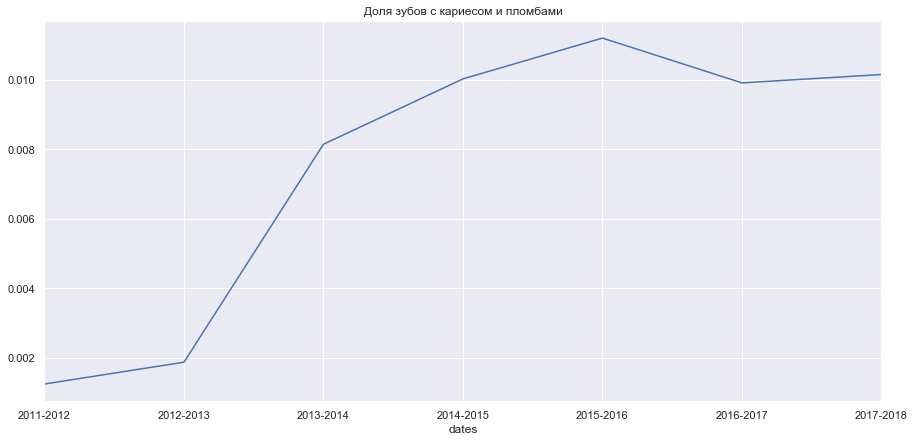

In [25]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_filling_caries'] = years_sum[['num_filling_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_filling_caries'].plot()
plt.title('Доля зубов с кариесом и пломбами')

# Процент зубов без кариеса с пломбами

57 30
0.018796992481203006
57 41
0.02568922305764411
57 74
0.046365914786967416
57 116
0.07268170426065163
118 237
0.07173123486682809
191 492
0.09199700822737472
190 600
0.11278195488721804


Text(0.5,1,'% пломб по годам, рассчитано для всех зубов с пломбами без кариеса всех кадетов')

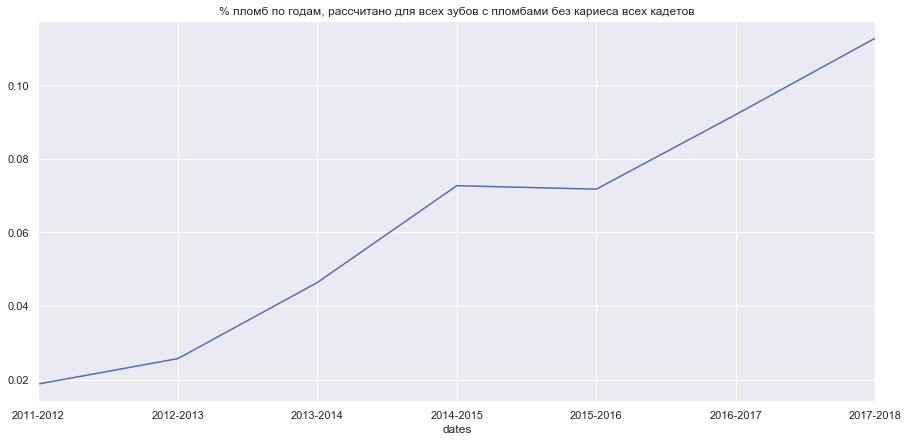

In [23]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_filling_no_caries'] = years_sum[['num_filling_no_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_filling_no_caries'].plot()
plt.title('% пломб по годам, рассчитано для всех зубов с пломбами без кариеса')


In [20]:
years_sum

,not_registered,num_caries,num_filling_caries,num_filling_no_caries,num_healthy,num_removed_caused_by_caries,num_removed_other_reasons,prosthesis crown veneer,sealed fissure,uncut tooth,kpu,kpu_%,counts,all_teeth_caries
dates,,,,,,,,,,,,,,
2011-2012,218,54,2,30,1241,0,0,0,1,9,86,3.071429,57,0.033835
2012-2013,213,79,3,41,1212,0,0,0,2,5,123,4.392857,57,0.049499
2013-2014,5,113,13,74,1380,0,1,0,10,0,201,7.178571,57,0.070802
2014-2015,4,144,16,116,1301,3,1,0,11,0,280,10.000000,57,0.090226
2015-2016,245,199,37,237,2686,5,1,0,10,0,479,17.107143,118,0.060230
2016-2017,308,280,53,492,4193,7,1,0,10,0,833,29.750000,191,0.052356
2017-2018,23,209,54,600,4410,9,1,0,10,0,873,31.178571,190,0.039286


# Доля удаленных зубов из-за кариеса

57 0
0.0
57 0
0.0
57 0
0.0
57 3
0.0018796992481203006
118 5
0.001513317191283293
191 7
0.0013089005235602095
190 9
0.0016917293233082707


Text(0.5,1,'Доля удаленных зубов из-за кариеса по годам')

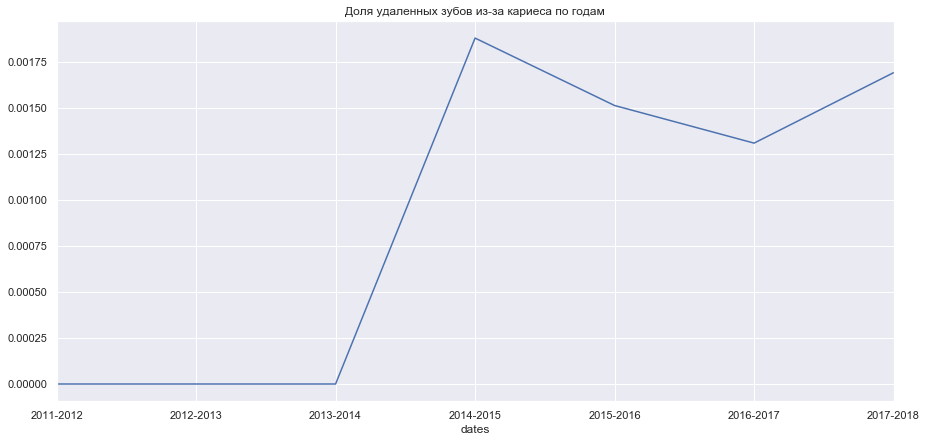

In [26]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_num_removed_caused_by_caries'] = years_sum[['num_removed_caused_by_caries', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_num_removed_caused_by_caries'].plot()
plt.title('Доля удаленных зубов из-за кариеса по годам')

# Доля удаленных зубов по другим причинам

57 0
0.0
57 0
0.0
57 1
0.0006265664160401002
57 1
0.0006265664160401002
118 1
0.0003026634382566586
191 1
0.00018698578908002991
190 1
0.00018796992481203009


Text(0.5,1,'Доля удаленных зубов(другие причины, кроме кариеса) по годам')

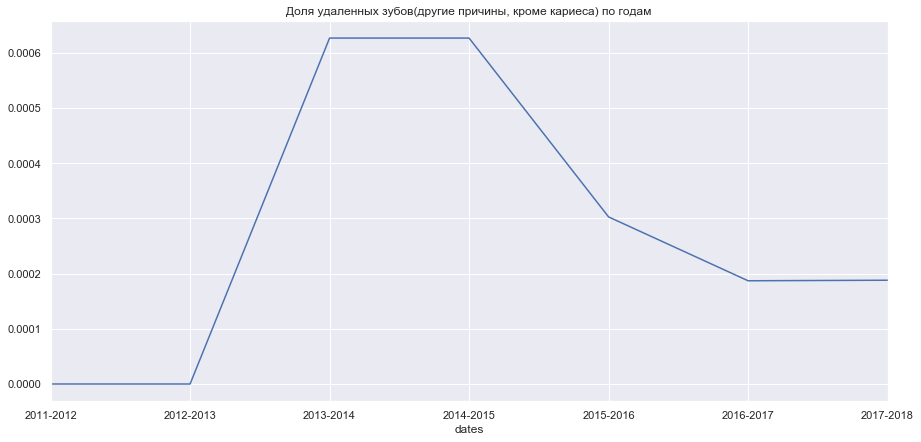

In [28]:
years_sum = data.groupby('dates').sum()
years_sum['counts'] = data['dates'].value_counts().sort_index()
years_sum['all_teeth_num_removed_other_reasons'] = years_sum[['num_removed_other_reasons', 'counts']].apply(lambda a: divide_all_teeth(a[0], a[1]), axis=1)
plt.figure(figsize=(15, 7))
years_sum['all_teeth_num_removed_other_reasons'].plot()
plt.title('Доля удаленных зубов(другие причины, кроме кариеса) по годам')


In [27]:
years_sum

,not_registered,num_caries,num_filling_caries,num_filling_no_caries,num_healthy,num_removed_caused_by_caries,num_removed_other_reasons,prosthesis crown veneer,sealed fissure,uncut tooth,kpu,kpu_%,counts,all_teeth_num_removed_caused_by_caries
dates,,,,,,,,,,,,,,
2011-2012,218,54,2,30,1241,0,0,0,1,9,86,3.071429,57,0.000000
2012-2013,213,79,3,41,1212,0,0,0,2,5,123,4.392857,57,0.000000
2013-2014,5,113,13,74,1380,0,1,0,10,0,201,7.178571,57,0.000000
2014-2015,4,144,16,116,1301,3,1,0,11,0,280,10.000000,57,0.001880
2015-2016,245,199,37,237,2686,5,1,0,10,0,479,17.107143,118,0.001513
2016-2017,308,280,53,492,4193,7,1,0,10,0,833,29.750000,191,0.001309
2017-2018,23,209,54,600,4410,9,1,0,10,0,873,31.178571,190,0.001692


In [24]:
data['dates'].value_counts().sort_index()

2011-2012     57
2012-2013     57
2013-2014     57
2014-2015     57
2015-2016    118
2016-2017    191
2017-2018    190
Name: dates, dtype: int64